## 사용 패키지

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

from sklearn.ensemble import RandomForestRegressor

from pycaret.regression import *

In [2]:
import tensorflow as tf

## 데이터 로드

In [99]:
train = pd.read_csv('G:\내 드라이브\Github\Dacon_Prediction-of-number-AI/train.csv')
test = pd.read_csv('G:\내 드라이브\Github\Dacon_Prediction-of-number-AI/test.csv')
submission = pd.read_csv('G:\내 드라이브\Github\Dacon_Prediction-of-number-AI/sample_submission.csv')


train['요일'][573]='금' # 데이터 오류 수정

In [100]:
drops = ['조식메뉴', '중식메뉴', '석식메뉴']

train = train.drop(drops, axis=1)
test = test.drop(drops, axis=1)

In [101]:
# temp.columns = ['일자','기온','풍속','체감기온']

In [102]:
# train = pd.merge(train, temp)
# test = pd.merge(test, temp)

In [103]:
# rain.columns = ['일자', '강수량']
# rain.fillna(0, inplace=True)

In [104]:
# train = pd.merge(train,rain)
# test = pd.merge(test, rain)

In [105]:
# plt.figure(figsize=(12,6))
# sns.barplot(train['일'], train['강수량'])

In [106]:
# plt.figure(figsize=(12,6))
# sns.regplot(train2['강수량'] , train2['중식계'])

In [107]:
# expr = train['강수량'] > 80

In [108]:
# train2 = train[expr]

In [109]:
# train2

In [110]:
# train.corr()

## 데이터

## 요일을 숫자로 매핑

In [111]:
train['요일'] = train['요일'].map({'월':1, '화':2, '수':3, '목':4, '금':5})
test['요일'] = test['요일'].map({'월':1, '화':2, '수':3, '목':4, '금':5})

## `요일 랭크지정 방식.`
## 석식에만 적용! 석식 수요일이 자기개발의 날 때문에 적어서.

In [119]:
weekdayrankfordinner = {
    1 : 1,
    2 : 2,
    3 : 5,
    4 : 3,
    5 : 4
} 

train['요일(석식)'] = train['요일'].map(weekdayrankfordinner)
test['요일(석식)'] = test['요일'].map(weekdayrankfordinner)

In [120]:
train['요일(석식)']

0       1
1       2
2       5
3       3
4       4
       ..
1200    5
1201    3
1202    4
1203    1
1204    2
Name: 요일(석식), Length: 1205, dtype: int64

## `월, 일을 숫자형으로 변환`

In [121]:
train['일자'] = pd.to_datetime(train['일자'])
test['일자'] = pd.to_datetime(test['일자'])

print(train['일자'])

train['년'] = train['일자'].dt.year
train['월'] = train['일자'].dt.month
train['일'] = train['일자'].dt.day
# train['주'] = train['일자'].dt.isocalendar().week
# train['요일'] = train['일자'].dt.weekday


test['년'] = test['일자'].dt.year
test['월'] = test['일자'].dt.month
test['일'] = test['일자'].dt.day
# test['주'] = test['일자'].dt.isocalendar().week
# test['요일'] = test['일자'].dt.weekday

# train['월'] = train['월'].astype('object') 
# train['일'] = train['일'].astype('object') 

# test['월'] = test['월'].astype('object')
# test['일'] = test['일'].astype('object')



0      2016-02-01
1      2016-02-02
2      2016-02-03
3      2016-02-04
4      2016-02-05
          ...    
1200   2021-01-20
1201   2021-01-21
1202   2021-01-22
1203   2021-01-25
1204   2021-01-26
Name: 일자, Length: 1205, dtype: datetime64[ns]


In [122]:
train.dtypes

일자                datetime64[ns]
요일                         int64
본사정원수                      int64
본사휴가자수                     int64
본사출장자수                     int64
본사시간외근무명령서승인건수             int64
현본사소속재택근무자수              float64
중식계                      float64
석식계                      float64
요일(석식)                     int64
년                          int64
월                          int64
일                          int64
dtype: object

## `0712 비율변수 추가`

## `월 랭크지정 방식` 낮은게 12 큰게 1 요일 랭크와 동일

In [123]:
month1 = {
    1:3,
    2:1,
    3:2,
    4:6,
    5:7,
    6:8,
    7:10,
    8:9,
    9:5,
    10:4,
    11:11,
    12:12
}

month2 = {
    1:11,
    2:2,
    3:1,
    4:4,
    5:8,
    6:6,
    7:9,
    8:7,
    9:5,
    10:3,
    11:10,
    12:12
}
train['월(중식)'] = train['월'].map(month1)
test['월(중식)'] = test['월'].map(month1)

train['월(석식)'] = train['월'].map(month2)
test['월(석식)'] = test['월'].map(month2)

train['월(중식)'] = train['월(중식)'].astype('int') # float형이라 int로 변경
test['월(중식)'] = test['월(중식)'].astype('int')
train['월(석식)'] = train['월(석식)'].astype('int')
test['월(석식)'] = test['월(석식)'].astype('int')

## `주 랭크지정 방식`


In [124]:
# #중식
# week1 = {
#     52	:	52	,
#     31	:	51	,
#     33	:	50	,
#     30	:	49	,
#     32	:	48	,
#     18	:	47	,
#     46	:	46	,
#     45	:	45	,
#     47	:	44	,
#     21	:	43	,
#     44	:	42	,
#     23	:	41	,
#     51	:	40	,
#     43	:	39	,
#     28	:	38	,
#     29	:	37	,
#     42	:	36	,
#     24	:	35	,
#     17	:	34	,
#     22	:	33	,
#     26	:	32	,
#     25	:	31	,
#     27	:	30	,
#     20	:	29	,
#     15	:	28	,
#     14	:	27	,
#     16	:	26	,
#     50	:	25	,
#     19	:	24	,
#     1	:	23	,
#     3	:	22	,
#     39	:	21	,
#     36	:	20	,
#     48	:	19	,
#     2	:	18	,
#     4	:	17	,
#     37	:	16	,
#     34	:	15	,
#     13	:	14	,
#     49	:	13	,
#     35	:	12	,
#     38	:	11	,
#     12	:	10	,
#     11	:	9	,
#     6	:	8	,
#     5	:	7	,
#     9	:	6	,
#     8	:	5	,
#     10	:	4	,
#     41	:	3	,
#     7	:	2	,
#     40	:	1	
# }

# #석식 위부터 작은수임

# week2 = {
#     52	:	52	,
#     1	:	51	,
#     31	:	50	,
#     4	:	49	,
#     48	:	48	,
#     30	:	47	,
#     26	:	46	,
#     51	:	45	,
#     43	:	44	,
#     44	:	43	,
#     46	:	42	,
#     2	:	41	,
#     17	:	40	,
#     22	:	39	,
#     33	:	38	,
#     39	:	37	,
#     29	:	36	,
#     3	:	35	,
#     32	:	34	,
#     45	:	33	,
#     18	:	32	,
#     5	:	31	,
#     47	:	30	,
#     35	:	29	,
#     23	:	28	,
#     28	:	27	,
#     37	:	26	,
#     21	:	25	,
#     19	:	24	,
#     27	:	23	,
#     24	:	22	,
#     42	:	21	,
#     9	:	20	,
#     20	:	19	,
#     38	:	18	,
#     50	:	17	,
#     25	:	16	,
#     13	:	15	,
#     16	:	14	,
#     49	:	13	,
#     12	:	12	,
#     36	:	11	,
#     15	:	10	,
#     14	:	9	,
#     34	:	8	,
#     6	:	7	,
#     11	:	6	,
#     8	:	5	,
#     7	:	4	,
#     41	:	3	,
#     10	:	2	,
#     40	:	1	
# }

# train['주(중식)'] = train['주'].map(week1)
# test['주(중식)'] = test['주'].map(week1)

# train['주(석식)'] = train['주'].map(week2)
# test['주(석식)'] = test['주'].map(week2)

# train['주(중식)'] = train['주(중식)'].astype('int') # float형이라 int로 변경
# test['주(중식)'] = test['주(중식)'].astype('int')
# train['주(석식)'] = train['주(석식)'].astype('int')
# test['주(석식)'] = test['주(석식)'].astype('int')

## `연도 랭크지정 방식` 효과 X

In [125]:
# year1 = {
#     2021 : 1,
#     2016 : 3,
#     2017 : 2,
#     2018 : 4,
#     2020 : 5,
#     2019 : 6
# }


# year2 = {
#     2016 : 1,
#     2017 : 3,
#     2018 : 2,
#     2019 : 4,
#     2020 : 5,
#     2021 : 6
# }





# train['년(중식)'] = train['년'].map(year1)
# test['년(중식)'] = test['년'].map(year1)

# train['년(석식)'] = train['년'].map(year2)
# test['년(석식)'] = test['년'].map(year2)

# train['년(중식)'] = train['년(중식)'].astype('int') # float형이라 int로 변경
# test['년(중식)'] = test['년(중식)'].astype('int')
# train['년(석식)'] = train['년(석식)'].astype('int')
# test['년(석식)'] = test['년(석식)'].astype('int')

## `일 랭크지정방식 ` 효과 X 사용안함

## `식사가능자수`

In [126]:
train['식사가능자수'] = (train['본사정원수'] - train['본사휴가자수'] - train['현본사소속재택근무자수'])
test['식사가능자수'] = (test['본사정원수'] - test['본사휴가자수'] - test['현본사소속재택근무자수'])

In [127]:
#train['중식참여율'] = train['중식계'] / train['식사가능자수']
#train['석식참여율'] = train['석식계'] / train['식사가능자수']

#test['중식참여율'] = test['중식계'] / test['식사가능자수']
#test['석식참여율'] = test['석식계'] / test['식사가능자수']

# `0708 공휴일 전후 추가 `

## `0713 공휴일 변경`

In [128]:
#휴일
train['휴일전날'] = 0
test['휴일전날'] = 0

train['휴일다음날'] = 0
test['휴일다음날'] = 0

#연휴 (주말포함 3일이상 휴일)
train['연휴전날'] = 0
test['연휴전날'] = 0

train['연휴다음날'] = 0
test['연휴다음날'] = 0

In [129]:
train['휴일다음날'][train['요일'] == 0] = 1 # 월요일
test['휴일다음날'][test['요일'] == 0] = 1

train['휴일전날'][train['요일'] == 4] = 1 # 금요일
test['휴일전날'][test['요일'] == 4] = 1

# 2016년
train['휴일전날'][17] = 1
train['휴일전날'][47] = 1
train['휴일전날'][62] = 1
train['휴일전날'][17] = 1
train['휴일전날'][152] = 1

train['휴일다음날'][5] = 1
train['휴일다음날'][18] = 1
train['휴일다음날'][48] = 1
train['휴일다음날'][83] = 1
train['휴일다음날'][132] = 1
train['휴일다음날'][163] = 1

#2017년
train['휴일전날'][245] = 1
train['휴일전날'][268] = 1
train['휴일전날'][309] = 1
train['휴일전날'][310] = 1
train['휴일전날'][330] = 1
train['휴일전날'][379] = 1

train['휴일다음날'][227] = 1
train['휴일다음날'][246] = 1
train['휴일다음날'][267] = 1
train['휴일다음날'][309] = 1
train['휴일다음날'][310] = 1
train['휴일다음날'][331] = 1
train['휴일다음날'][380] = 1
train['휴일다음날'][413] = 1
train['휴일다음날'][467] = 1


#2018년
train['휴일전날'][502] = 1
train['휴일전날'][510] = 1
train['휴일전날'][555] = 1
train['휴일전날'][565] = 1
train['휴일전날'][575] = 1
train['휴일전날'][579] = 1
train['휴일전날'][623] = 1
train['휴일전날'][651] = 1
train['휴일전날'][705] = 1
train['휴일전날'][709] = 1

train['휴일다음날'][471] = 1
train['휴일다음날'][511] = 1
train['휴일다음날'][556] = 1
train['휴일다음날'][566] = 1
train['휴일다음날'][576] = 1
train['휴일다음날'][580] = 1
train['휴일다음날'][624] = 1
train['휴일다음날'][652] = 1
train['휴일다음날'][706] = 1


#2019년
train['휴일전날'][728] = 1
train['휴일전날'][814] = 1
train['휴일전날'][863] = 1
train['휴일전날'][882] = 1
train['휴일전날'][894] = 1
train['휴일전날'][897] = 1
train['휴일전날'][951] = 1
train['휴일전날'][893] = 1
train['휴일전날'][955] = 1

train['휴일다음날'][710] = 1
train['휴일다음날'][733] = 1
train['휴일다음날'][793] = 1
train['휴일다음날'][815] = 1
train['휴일다음날'][864] = 1
train['휴일다음날'][894] = 1
train['휴일다음날'][898] = 1
train['휴일다음날'][952] = 1
train['휴일다음날'][895] = 1


#2020년
train['휴일전날'][971] = 1
train['휴일전날'][1027] = 1
train['휴일전날'][1037] = 1
train['휴일전날'][1038] = 1
train['휴일전날'][1133] = 1
train['휴일전날'][1187] = 1

train['휴일다음날'][956] = 1
train['휴일다음날'][972] = 1
train['휴일다음날'][996] = 1
train['휴일다음날'][1028] = 1
train['휴일다음날'][1039] = 1

#2021년
test['휴일전날'][10] = 1
test['휴일다음날'][21] = 1



# # 원핫인코딩
# train = pd.get_dummies(train, columns=['공휴일전후'])
# test = pd.get_dummies(test, columns=['공휴일전후'])

# test['공휴일전후_0'][20] =1
# test['공휴일전후_1'][20] = 0

In [130]:
train['휴일다음날'][train['요일'] == 0] = 1
test['휴일다음날'][test['요일'] == 0] = 1

train['휴일전날'][train['요일'] == 4] = 1
test['휴일전날'][test['요일'] == 4] = 1


# 요일 원핫인코딩 
# train = pd.get_dummies(train, columns=['요일'])
# test = pd.get_dummies(test, columns=['요일'])
# 요일_0 : 월 / 요일_1 : 화 / 요일_2 : 수 / 요일_3 : 목 / 요일_4 : 금

## `0714 연휴 전 후 추가(주말포함 3일이상 휴일)`

In [131]:
#2016
train['연휴전날'][4] = 1
train['연휴전날'][82] = 1 #
train['연휴전날'][131] = 1
train['연휴전날'][152] = 1
train['연휴전날'][162] = 1 #

train['연휴다음날'][5] = 1
train['연휴다음날'][83] = 1
train['연휴다음날'][132] = 1
train['연휴다음날'][153] = 1
train['연휴다음날'][163] = 1


#2017
train['연휴전날'][245] = 1
train['연휴전날'][309] = 1
train['연휴전날'][310] = 2
train['연휴전날'][412] = 1
train['연휴전날'][466] = 1 #
train['연휴전날'][470] = 1

train['연휴다음날'][246] = 1
train['연휴다음날'][309] = 1 #
train['연휴다음날'][310] = 1 #
train['연휴다음날'][413] = 1
train['연휴다음날'][467] = 1 #


#2018
train['연휴전날'][502] = 2
train['연휴전날'][555] = 1 #
train['연휴전날'][650] = 1

train['연휴다음날'][471] = 1
train['연휴다음날'][503] = 1
train['연휴다음날'][556] = 1
train['연휴다음날'][651] = 1

#2019
train['연휴전날'][732] = 1
train['연휴전날'][748] = 1
train['연휴전날'][792] = 1
train['연휴전날'][882] = 1

train['연휴다음날'][733] = 1
train['연휴다음날'][749] = 1 #
train['연휴다음날'][793] = 1 #
train['연휴다음날'][883] = 1

#2020
train['연휴전날'][971] = 1
train['연휴전날'][1129] = 1
train['연휴전날'][1187] = 1

train['연휴다음날'][972] = 1
train['연휴다음날'][1130] = 1

#2021
test['연휴전날'][10] = 1
test['연휴전날'][20] = 1 # 같은달에 설날이 있어서 휴가 제한


train['연휴다음날'][1188] = 1

test['연휴다음날'][11] = 1
test['연휴다음날'][21] = 1 


# 공휴일 전후 (동완형꺼)

In [132]:
train['공휴일전후'] = 0
test['공휴일전후'] = 0

In [133]:
train['공휴일전후'][4] = 1
train['공휴일전후'][17] = 1
#train['공휴일전후'][62] = 1
# train['공휴일전후'][67] = 1
# train['공휴일전후'][82] = 1
# train['공휴일전후'][130] = 1
train['공휴일전후'][131] = 1
train['공휴일전후'][152] = 1
train['공휴일전후'][221] = 1
train['공휴일전후'][226] = 1
#train['공휴일전후'][222] = 1
train['공휴일전후'][224] = 1
train['공휴일전후'][225] = 1
# train['공휴일전후'][244] = 1
train['공휴일전후'][245] = 1
# train['공휴일전후'][267] = 1
train['공휴일전후'][309] = 1
train['공휴일전후'][310] = 2
train['공휴일전후'][311] = 1
train['공휴일전후'][330] = 1
train['공휴일전후'][379] = 1
train['공휴일전후'][467] = 1
# train['공휴일전후'][469] = 1
train['공휴일전후'][470] = 1
train['공휴일전후'][502] = 2
# train['공휴일전후'][501] = 1
train['공휴일전후'][511] = 1
train['공휴일전후'][565] = 1
train['공휴일전후'][623] = 1
train['공휴일전후'][651] = 1
# train['공휴일전후'][650] = 1
train['공휴일전후'][705] = 2
# train['공휴일전후'][707] = 1
train['공휴일전후'][709] = 2
# train['공휴일전후'][733] = 1
# train['공휴일전후'][748] = 1
# train['공휴일전후'][792] = 1
train['공휴일전후'][815] = 2
train['공휴일전후'][864] = 1
# train['공휴일전후'][863] = 1
train['공휴일전후'][950] = 1
train['공휴일전후'][951] = 1
train['공휴일전후'][953] = 2
train['공휴일전후'][954] = 1
train['공휴일전후'][955] = 1
train['공휴일전후'][971] = 1
# train['공휴일전후'][970] = 1
# train['공휴일전후'][1037] = 1
train['공휴일전후'][1038] = 1
train['공휴일전후'][1099] = 1
train['공휴일전후'][1129] = 2
# train['공휴일전후'][1128] = 1
train['공휴일전후'][1187] = 1
# train['공휴일전후'][1186] = 1

test['공휴일전후'][10] = 2
test['공휴일전후'][20] = 1 # 연휴랑 겹쳐서 뺌

In [134]:
test.iloc[10]

일자                2021-02-10 00:00:00
요일                                  3
본사정원수                            2924
본사휴가자수                            489
본사출장자수                            134
본사시간외근무명령서승인건수                      0
현본사소속재택근무자수                     233.0
요일(석식)                              5
년                                2021
월                                   2
일                                  10
월(중식)                               1
월(석식)                               2
식사가능자수                         2202.0
휴일전날                                1
휴일다음날                               0
연휴전날                                1
연휴다음날                               0
공휴일전후                               2
Name: 10, dtype: object

In [135]:
# 원핫인코딩
train = pd.get_dummies(train, columns=['공휴일전후'])
test = pd.get_dummies(test, columns=['공휴일전후'])

In [136]:
test['공휴일전후_1'][20] = 0 # test 1변수를 위해
test['공휴일전후_0'][20] = 1

In [137]:
# train['월'] = train['월'].astype('object')
# train['일'] = train['일'].astype('object')

# test['월'] = test['월'].astype('object')
# test['일'] = test['일'].astype('object')

# train['공휴일전후'] = train['공휴일전후'].astype('object')
# test['공휴일전후'] = test['공휴일전후'].astype('object')

# train['연휴전날'] = train['연휴전날'].astype('object')
# test['연휴전날'] = test['연휴전날'].astype('object')
# train['연휴다음날'] = train['연휴다음날'].astype('object')
# test['연휴다음날'] = test['연휴다음날'].astype('object')

# train['휴일전날'] = train['휴일전날'].astype('object')
# test['휴일전날'] = test['휴일전날'].astype('object')
# train['휴일다음날'] = train['휴일다음날'].astype('object')
# test['휴일다음날'] = test['휴일다음날'].astype('object')

## Feature

In [138]:
x1_train = train[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수','월(중식)','일','요일','공휴일전후_0', '공휴일전후_1','공휴일전후_2']] #중식계
x2_train = train[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수','월(석식)','일','요일(석식)','공휴일전후_0', '공휴일전후_1','공휴일전후_2']] #석식계

y1_train = train['중식계']
y2_train = train['석식계']

x1_test = test[[ '본사시간외근무명령서승인건수', '식사가능자수','본사출장자수','월(중식)','일','요일','공휴일전후_0', '공휴일전후_1','공휴일전후_2']]
x2_test = test[[ '본사시간외근무명령서승인건수', '식사가능자수','본사출장자수','월(석식)','일','요일(석식)','공휴일전후_0', '공휴일전후_1','공휴일전후_2']]


# categorical_features_indices1 = np.where(x1_train.dtypes == np.object)[0]
# categorical_features_indices2 = np.where(x2_train.dtypes == np.object)[0]

In [139]:
x1_train.dtypes

본사시간외근무명령서승인건수      int64
식사가능자수            float64
본사출장자수              int64
월(중식)               int32
일                   int64
요일                  int64
공휴일전후_0             uint8
공휴일전후_1             uint8
공휴일전후_2             uint8
dtype: object

## `0714 연휴 전, 후` (주말포함 3일 이상 휴일)

In [140]:
# x1_train = train[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수','월(중식)','일','휴일전날','휴일다음날','연휴전날','연휴다음날','요일']] #중식계
# x2_train = train[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수','월(석식)','일','휴일전날','휴일다음날','연휴전날','연휴다음날','요일(석식)']] #석식계

# y1_train = train['중식계']
# y2_train = train['석식계']

# x1_test = test[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수', '월(중식)','일','휴일전날','휴일다음날','연휴전날','연휴다음날','요일']]
# x2_test = test[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수', '월(석식)','일','휴일전날','휴일다음날','연휴전날','연휴다음날','요일(석식)']]

In [141]:
# x1_train = train[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수','월(중식)','일','휴일전날','요일']] #중식계
# x2_train = train[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수','월(석식)','일','휴일전날','요일(석식)']] #석식계

# y1_train = train['중식계']
# y2_train = train['석식계']

# x1_test = test[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수', '월(중식)','일','휴일전날','요일']]
# x2_test = test[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수', '월(석식)','일','휴일전날','요일(석식)']]

## 점심과 저녁을 식수 인원을 예측할 2개 모델 생성

In [142]:
# model1 = RandomForestRegressor(n_jobs=-1, random_state=42)
# model2 = RandomForestRegressor(n_jobs=-1, random_state=42)

## 학습

In [98]:
# model1.fit(x1_train, y1_train) #중식계
# model2.fit(x2_train, y2_train) #석식계

## 추론

In [99]:
# pred1 = model1.predict(x1_test)
# pred2 = model2.predict(x2_test)

## 결과 제출

In [100]:
# submission['중식계'] = pred1
# submission['석식계'] = pred2

In [101]:
# submission.to_csv('baseline.csv', index=False)

# `Kfold 적용 버전`

In [102]:
# from sklearn.model_selection import KFold
# k_fold = KFold(n_splits = 5, shuffle = True, random_state = 777)

In [103]:
# model1.fit(x1_train, y1_train) #중식계
# model2.fit(x2_train, y2_train) #석식계

In [104]:
# model1 = cat
# models1 = [] # 교차검증을 위한 바구나 5개

# for train_idx, val_idx in k_fold.split(x1_train):
#     x1_t = x1_train.iloc[train_idx]
#     y1_t = y1_train.iloc[train_idx]
#     x1_val = x1_train.iloc[val_idx]
#     y1_val = y1_train.iloc[val_idx]
    
#      models1.append(model1.fit(x1_t, y1_t))#, eval_set = (x1_val, y1_val), early_stopping_rounds=100, verbose = 100))

# preds1 = []
# for model1 in models1:
#     preds1.append(model1.predict(x1_test))    


# model2 = cat
# models2 = [] # 교차검증을 위한 바구나 5개

# for train_idx, val_idx in k_fold.split(x2_train):
#     x2_t = x2_train.iloc[train_idx]
#     y2_t = y2_train.iloc[train_idx]
#     x2_val = x2_train.iloc[val_idx]
#     y2_val = y2_train.iloc[val_idx]
    
#     models2.append(model2.fit(x2_t, y2_t))#, eval_set = (x2_val, y2_val), early_stopping_rounds=100, verbose = 100))
    

# preds2 = []
# for model2 in models2:
#     preds2.append(model2.predict(x2_test))

In [105]:
# pred1 = np.mean(preds1, axis=0)
# pred2 = np.mean(preds2, axis=0)

In [106]:
# submission['중식계'] = pred1
# submission['석식계'] = pred2

In [107]:
# submission.to_csv('baseline0712.csv', index=False)

## `앙상블 모델 적용 버전`

In [41]:
# 메뉴
train_lunch = pd.concat([x1_train, train['중식계']], axis = 1) # concat cbind 역할
train_dinner = pd.concat([x2_train, train['석식계']], axis = 1)
test_lunch = pd.concat([x1_test], axis = 1)
test_dinner = pd.concat([x2_test], axis = 1)
print('done')

done


### 중식 모델링

In [42]:
reg = setup(data=pd.concat([x1_train,train['중식계']], axis=1), # concat cbind 역할
            target='중식계',
            numeric_imputation = 'mean',
            normalize = True,
            silent= True)
print('done')

,Description,Value
0,session_id,3443
1,Target,중식계
2,Original Data,"(1205, 8)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(843, 11)"


done


In [43]:
best_5_l = compare_models(sort='MAE', n_select=5)
print('done')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,71.0293,9474.2319,96.0941,0.7823,0.1200,0.0873,1.9900
gbr,Gradient Boosting Regressor,73.2368,9699.0749,97.7766,0.7743,0.1237,0.0901,0.0780
et,Extra Trees Regressor,74.4224,10174.7114,100.0021,0.7637,0.1251,0.0916,0.2000
rf,Random Forest Regressor,74.4327,10049.3393,99.6017,0.7661,0.1248,0.0919,0.3370
lightgbm,Light Gradient Boosting Machine,76.3760,10560.5000,102.0336,0.7552,0.1281,0.0934,0.0560
knn,K Neighbors Regressor,82.0795,11739.3365,107.6744,0.7229,0.1360,0.1020,0.0190
huber,Huber Regressor,82.8015,13146.2776,113.4520,0.6972,0.1464,0.1063,0.0390
ada,AdaBoost Regressor,83.4035,11727.3723,107.8088,0.7278,0.1356,0.1039,0.0880
lasso,Lasso Regression,84.8923,12510.4397,111.0112,0.7104,0.1419,0.1066,0.0100
ridge,Ridge Regression,84.9606,12416.9507,110.5650,0.7127,0.1410,0.1064,0.0100


done


In [44]:
blended_l = blend_models(estimator_list= best_5_l, fold=5, optimize='MAE')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)

pred_esb_l = predict_model(final_model_l, test_lunch)

pred_esb_l['Label']

submission_esb = pd.read_csv('G:\내 드라이브\Github\Dacon_Prediction-of-number-AI/sample_submission.csv')
submission_esb['중식계'] = pred_esb_l['Label']

print('done')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,78.9277,12424.2009,111.4639,0.7439,0.1526,0.1074
1,75.0249,9712.4297,98.5517,0.7710,0.1196,0.0898
2,67.2974,7958.6146,89.2111,0.7948,0.1014,0.0786
3,69.2626,8067.5098,89.8193,0.8185,0.1102,0.0837
4,66.0093,8018.6578,89.5470,0.8148,0.1130,0.0776
Mean,71.3044,9236.2826,95.7186,0.7886,0.1194,0.0874
SD,4.9035,1724.5646,8.6160,0.0280,0.0176,0.0109


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,80.0379,11521.9170,107.3402,0.7409,0.1290,0.0963


done


### 석식모델링

In [45]:
reg = setup(data=pd.concat([x2_train,train['석식계']], axis=1), # concat cbind 역할
            target='석식계',
            numeric_imputation = 'mean',
            normalize = True,
            silent= True)
print('done')

,Description,Value
0,session_id,1949
1,Target,석식계
2,Original Data,"(1205, 8)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(843, 11)"


done


In [46]:
best_5_d = compare_models(sort = 'MAE', n_select = 5)
print('done')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,59.6412,7178.0414,83.8589,0.6398,0.9267,0.1303,0.2120
rf,Random Forest Regressor,60.7619,7535.8584,85.4586,0.6278,0.9287,0.1369,0.2630
catboost,CatBoost Regressor,61.3526,7480.2083,85.7074,0.6269,0.9233,0.1371,1.9400
gbr,Gradient Boosting Regressor,64.2338,8115.7911,89.1888,0.5977,0.9642,0.1419,0.1130
lightgbm,Light Gradient Boosting Machine,64.5274,8243.0680,89.6632,0.5900,0.9258,0.1436,0.0650
knn,K Neighbors Regressor,72.4601,10775.4283,102.8146,0.4671,1.0628,0.1548,0.0160
huber,Huber Regressor,73.7189,12143.6517,108.4958,0.4104,1.1280,0.1471,0.0430
ada,AdaBoost Regressor,76.7111,10773.7821,103.3104,0.4572,1.0504,0.1661,0.0770
lr,Linear Regression,77.1279,11516.1748,106.2884,0.4331,1.0983,0.1579,0.0180
ridge,Ridge Regression,77.1551,11515.5496,106.2916,0.4332,1.0992,0.1581,0.0100


done


In [47]:
blended_d = blend_models(estimator_list = best_5_d, fold = 5, optimize = 'MAE')
pred_holdout = predict_model(blended_d)
final_model_d = finalize_model(blended_d)
pred_esb_d = predict_model(final_model_d, test_dinner)
print('done')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,64.3750,8201.7363,90.5634,0.6317,1.1935,0.1389
1,63.9668,8837.4873,94.0079,0.5226,0.5610,0.1446
2,61.4659,7353.8024,85.7543,0.6151,0.9233,0.1298
3,58.4810,7726.7873,87.9021,0.6309,1.2487,0.1189
4,56.0365,5390.5220,73.4202,0.7375,0.9493,0.1381
Mean,60.8650,7502.0671,86.3296,0.6276,0.9752,0.1341
SD,3.2031,1166.5323,7.0191,0.0683,0.2439,0.0089


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,60.2150,7822.1011,88.4426,0.5368,0.7656,0.1330


done


In [48]:
pred_esb_d = predict_model(final_model_d, test_dinner)

In [49]:
submission_esb['석식계'] = pred_esb_d['Label']
submission_esb

,일자,중식계,석식계
0,2021-01-27,1007.289634,122.491197
1,2021-01-28,952.754981,471.995942
2,2021-01-29,617.407134,213.205380
3,2021-02-01,1242.307097,569.057264
4,2021-02-02,1022.711002,558.592561
5,2021-02-03,1058.961986,515.265650
6,2021-02-04,1009.874658,558.882681
7,2021-02-05,707.577164,397.781719
8,2021-02-08,1287.935264,688.613764
9,2021-02-09,1061.388488,583.751272


In [59]:
# submission_esb.to_csv('ensembleW.csv', index = False)

- 0708 23:11

randomforest default mae로 바꿈(대회 측정방식)->mae:73 mse:66 오히려 mse가 더 좋게나왔음..

- 0709 00:28

출장자수 변수추가했더니 1점 높게나옴. 추가할 것

- 0709 20:35
    
체감온도 추가 효과 오히려 감소

- 0709 21:38

월 매핑 -> 0.5점 상승! 체감온도는 그냥 뺐음..

---
- 0710 01:51

앙상블 모델 적용.
효과는 안좋았음. 테스트용으로만 써보자.


`중식` 중식개선필요.

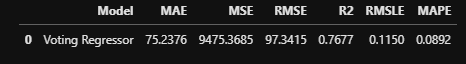

`석식`

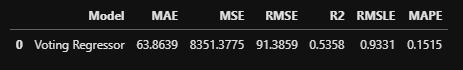

---
- 0711 13:59
    
월 매핑 제대로 안돼있었음.. 수정 후 제출! 63.792 `최고기록`

`중식`

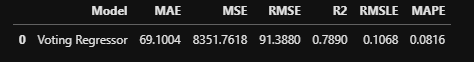

`석식`

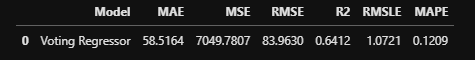


---
- 0711 14:46

연도 매핑 후 연도 추가. 중식은 성능 안좋길래 석식만 넣고 제출 그런데 결과는 68점; 연도 다시 제거!!

`중식`

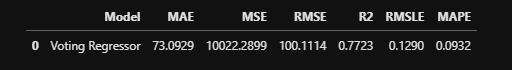

`석식`

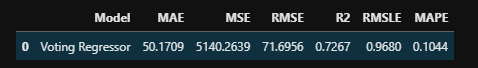

---
- 0711 17:03

일 매핑. 결과 안좋음.. 제거!

---
- 0711 17:26
    
휴가자수 식사가능자수에서 뺐지만 따로 추가해주었음. 파일명 : ensembleVacc.csv

`중식`

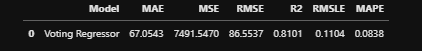

`석식` 

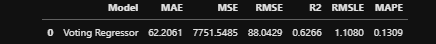

---
- 0711 17:51
    
식사가능자수 <- 식사가능자수/본사정원수로 잠시 변경, 휴가자수도 뺌

`중식`

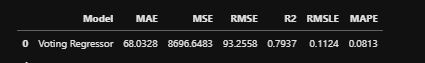

`석식`

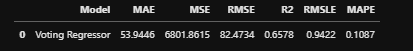

제출결과 안좋음.. 다시 복구

---
- 0712 00:23

휴가자수 임의로 더한걸 뺀다고 생각하고 출장자수를 없앴었음.... 그래서 계속 작게나옴;

이번엔 주, 년을 모두 추가하고 돌려봤다./ 해사꺼 비율시리즈 다 추가했더니 72점나옴.....

`중식`

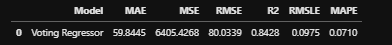

`석식`

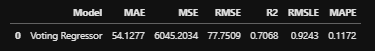

---
- 0712 01:15
    
최고기록에 주 랭크매핑 후 제출. 66.195점.. 낮게나옴



`중식`

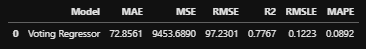

`석식`

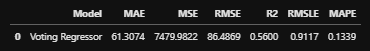

---
- 0714 
일 대신 주를 넣어서 비교.

`일을넣은 앙상블`

중식

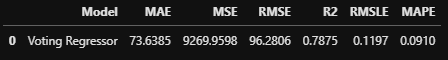

석식

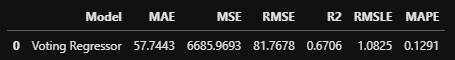

`주를넣은 앙상블`


중식

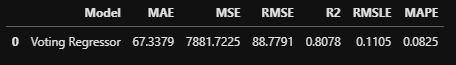

석식

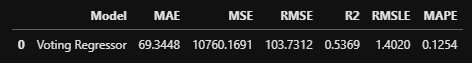

중식은 주를 넣고 석식은 일을 넣어보자 > 3점 더 안좋게나옴.. 그대로 일을 쓰자..

---
0715 0000

요일 더미 vs 요일 랭크 비교.

요일 랭크한게 더 점수가 좋음. 랭크사용!

---
0715 1700

여기서 '연휴' = 주말을 포함해서 휴일이 연속적으로 3일 이상일 때

비교해볼것 : 휴일 , 연휴 전날 다음날 다넣은거 / 휴일 , 연휴 전날만 넣은거  / 연휴만 넣은거 / 휴일만 넣은거
    
1.



2.

3.

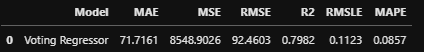

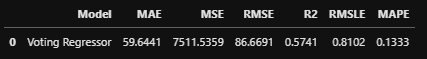

4.


---
연휴 전날만 넣은거

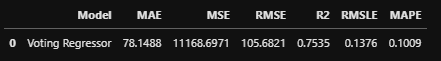

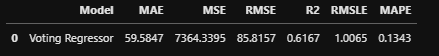


# `Catboost + Kfold`

In [ ]:
# from catboost import CatBoostRegressor
# cat = CatBoostRegressor()

# model1 = cat
# model2 = cat

# model1.fit(x1_train, y1_train) #중식계
# pred1 = model1.predict(x1_test)

# model2.fit(x2_train, y2_train) #석식계
# pred2 = model2.predict(x2_test)

# from sklearn.model_selection import KFold

# k_fold = KFold(n_splits = 5, shuffle = True, random_state = 777)

# model1 = cat
# models1 = [] # 교차검증을 위한 바구나 5개

# for train_idx, val_idx in k_fold.split(x1_train):
#     x1_t = x1_train.iloc[train_idx]
#     y1_t = y1_train.iloc[train_idx]
#     x1_val = x1_train.iloc[val_idx]
#     y1_val = y1_train.iloc[val_idx]
    
#     models1.append(model1.fit(x1_t, y1_t, eval_set = (x1_val, y1_val), early_stopping_rounds=100, verbose = 100))

# preds1 = []
# for model1 in models1:
#     preds1.append(model1.predict(x1_test))    


# model2 = cat
# models2 = [] # 교차검증을 위한 바구나 5개

# for train_idx, val_idx in k_fold.split(x2_train):
#     x2_t = x2_train.iloc[train_idx]
#     y2_t = y2_train.iloc[train_idx]
#     x2_val = x2_train.iloc[val_idx]
#     y2_val = y2_train.iloc[val_idx]
    
#     models2.append(model2.fit(x2_t, y2_t, eval_set = (x2_val, y2_val), early_stopping_rounds=100, verbose = 100))
    

# preds2 = []
# for model2 in models2:
#     preds2.append(model2.predict(x2_test))
    
# pred1 = np.mean(preds1, axis=0)
# pred2 = np.mean(preds2, axis=0)

# submission['중식계'] = pred1
# submission['석식계'] = pred2

# submission.to_csv('catKfold.csv', index=False)

# `Catboost 만 `

In [177]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(loss_function='MAE')

model1 = cat
model2 = cat

model1.fit(x1_train, y1_train, cat_features=categorical_features_indices1) #중식계
pred1 = model1.predict(x1_test)

model2.fit(x2_train, y2_train, cat_features=categorical_features_indices2) #석식계
pred2 = model2.predict(x2_test)

submission['중식계'] = pred1
submission['석식계'] = pred2


submission.to_csv('catcategory4.csv', index=False)


0:	learn: 164.3033850	total: 46.8ms	remaining: 46.8s
1:	learn: 161.2568250	total: 90.1ms	remaining: 45s
2:	learn: 158.1848073	total: 140ms	remaining: 46.4s
3:	learn: 155.0214170	total: 188ms	remaining: 46.9s
4:	learn: 152.1915029	total: 228ms	remaining: 45.4s
5:	learn: 149.3493022	total: 268ms	remaining: 44.4s
6:	learn: 146.5939035	total: 302ms	remaining: 42.9s
7:	learn: 145.2046226	total: 318ms	remaining: 39.5s
8:	learn: 142.8864688	total: 348ms	remaining: 38.4s
9:	learn: 140.3189869	total: 435ms	remaining: 43.1s
10:	learn: 137.9002367	total: 477ms	remaining: 42.9s
11:	learn: 135.6693571	total: 518ms	remaining: 42.6s
12:	learn: 133.5808550	total: 594ms	remaining: 45.1s
13:	learn: 131.3305834	total: 624ms	remaining: 43.9s
14:	learn: 129.0962310	total: 654ms	remaining: 42.9s
15:	learn: 127.0797325	total: 681ms	remaining: 41.9s
16:	learn: 125.1395783	total: 711ms	remaining: 41.1s
17:	learn: 123.1396946	total: 752ms	remaining: 41s
18:	learn: 121.4672367	total: 783ms	remaining: 40.5s
19:	l

In [41]:
submission

,일자,중식계,석식계
0,2021-01-27,1000.553395,388.854436
1,2021-01-28,971.274354,480.388080
2,2021-01-29,647.227496,237.721193
3,2021-02-01,1257.332116,577.452447
4,2021-02-02,1081.437509,600.991191
5,2021-02-03,1052.817805,508.442005
6,2021-02-04,1015.345168,569.060182
7,2021-02-05,744.826809,363.993215
8,2021-02-08,1298.529783,659.054682
9,2021-02-09,1085.955000,605.498252


In [ ]:
pred = model1.predict(x1_test)
mae = (mean_absolute_error(y1_test, pred))
r2 = r2_score(y1_test, pred)
print('Testing performance')
print('MAE: {:.2f}'.format(mae))
print('R2: {:.2f}'.format(r2))

In [ ]:
pred = model2.predict(x2_test)
mae = (mean_absolute_error(y2_test, pred))
r2 = r2_score(y_test2, pred)
print('Testing performance')
print('MAE: {:.2f}'.format(mae))
print('R2: {:.2f}'.format(r2))

# `NEW CatBOOST` 석식계로 중식계를 예측

In [ ]:
# # 일단 석식계만 예측

# from catboost import CatBoostRegressor
# cat = CatBoostRegressor()

# model1 = cat
# model2 = cat

# model2.fit(x2_train, y2_train) #석식계
# pred2 = model2.predict(x2_test)

# submission['석식계'] = pred2

In [34]:
# # 예측한 걸 테스트에 변수로 넣음
# test['석식계'] = pred2

In [35]:
# # 예측한 걸 테스트에 변수로 넣음
# x1_train = train[['요일', '본사시간외근무명령서승인건수', '식사가능자수','월(중식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수','석식계']] #중식계

# x1_test = test[['요일', '본사시간외근무명령서승인건수', '식사가능자수', '월(중식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수','석식계']] #중식계

In [69]:
# # 석식계를 이용해서 중식계 예측

# model1.fit(x1_train, y1_train) #중식계
# pred1 = model1.predict(x1_test)

In [38]:
# # 최종결과
# submission['중식계'] = pred1
# submission['석식계'] = pred2
# submission.to_csv('catlun.csv', index=False)

In [180]:
train.tail(100)

,일자,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,요일(석식),년,...,주(중식),주(석식),식사가능자수,휴일전날,휴일다음날,요일_0,요일_1,요일_2,요일_3,요일_4
1105,2020-08-25,2989,219,190,757,285.0,1046.0,632.0,2,2020,...,12,29,2485.0,0,0,0,1,0,0,0
1106,2020-08-26,2989,215,197,2,363.0,897.0,495.0,5,2020,...,12,29,2411.0,0,0,0,0,1,0,0
1107,2020-08-27,2989,205,211,575,316.0,963.0,522.0,3,2020,...,12,29,2468.0,0,0,0,0,0,1,0
1108,2020-08-28,2989,320,230,0,297.0,784.0,354.0,4,2020,...,12,29,2372.0,1,0,0,0,0,0,1
1109,2020-08-31,2989,183,163,648,464.0,1243.0,649.0,1,2020,...,20,11,2342.0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,2983,75,198,4,391.0,1093.0,421.0,5,2021,...,22,35,2517.0,0,0,0,0,1,0,0
1201,2021-01-21,2983,92,231,462,351.0,832.0,353.0,3,2021,...,22,35,2540.0,0,0,0,0,0,1,0
1202,2021-01-22,2983,255,248,1,303.0,579.0,217.0,4,2021,...,22,35,2425.0,1,0,0,0,0,0,1
1203,2021-01-25,2983,107,153,616,327.0,1145.0,502.0,1,2021,...,17,49,2549.0,0,1,1,0,0,0,0


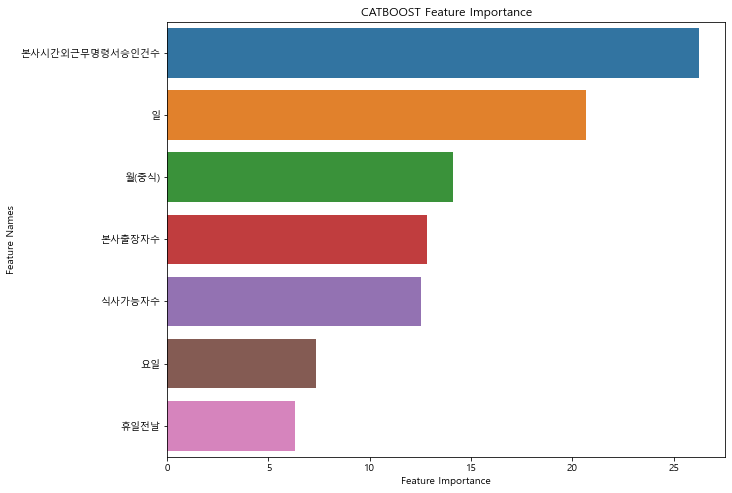

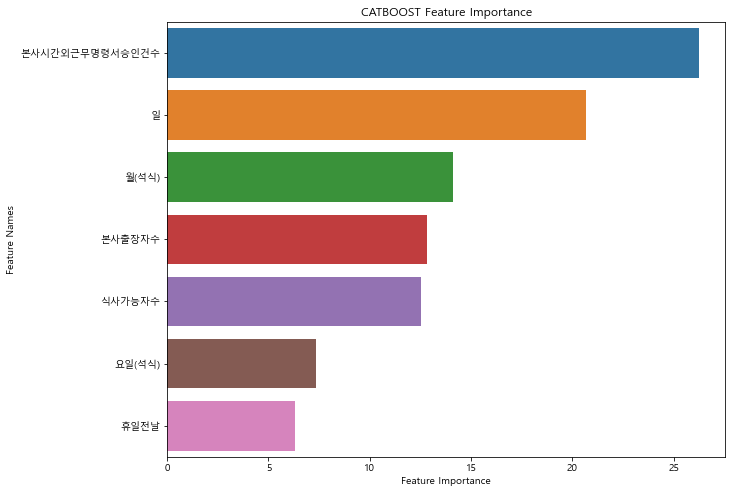

In [52]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')



plot_feature_importance(model1.get_feature_importance(),x1_test.columns,'CATBOOST')

plot_feature_importance(model2.get_feature_importance(),x2_test.columns,'CATBOOST')

In [178]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(loss_function='MAE')

In [179]:
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error

model = cb.CatBoostRegressor(loss_function ='MAE')

X_train, X_test, y_train, y_test = train_test_split(x1_train, y1_train, test_size = 0.2, random_state=5)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2_train, y2_train, test_size = 0.2, random_state=5)

model1 = cat
model2 = cat



In [180]:
model1 = cat

model1.fit(x1_train, y1_train, cat_features=categorical_features_indices1) #중식계
pred1 = model1.predict(x1_test)

submission['중식계'] = pred1

0:	learn: 164.3033850	total: 26.4ms	remaining: 26.3s
1:	learn: 161.2568250	total: 50.1ms	remaining: 25s
2:	learn: 158.1848073	total: 81.9ms	remaining: 27.2s
3:	learn: 155.0214170	total: 109ms	remaining: 27.2s
4:	learn: 152.1915029	total: 134ms	remaining: 26.7s
5:	learn: 149.3493022	total: 161ms	remaining: 26.7s
6:	learn: 146.5939035	total: 186ms	remaining: 26.5s
7:	learn: 145.2046226	total: 199ms	remaining: 24.7s
8:	learn: 142.8864688	total: 225ms	remaining: 24.7s
9:	learn: 140.3189869	total: 254ms	remaining: 25.2s
10:	learn: 137.9002367	total: 283ms	remaining: 25.4s
11:	learn: 135.6693571	total: 308ms	remaining: 25.4s
12:	learn: 133.5808550	total: 334ms	remaining: 25.3s
13:	learn: 131.3305834	total: 362ms	remaining: 25.5s
14:	learn: 129.0962310	total: 387ms	remaining: 25.4s
15:	learn: 127.0797325	total: 415ms	remaining: 25.5s
16:	learn: 125.1395783	total: 443ms	remaining: 25.6s
17:	learn: 123.1396946	total: 475ms	remaining: 25.9s
18:	learn: 121.4672367	total: 504ms	remaining: 26s
19:	

In [181]:
pred1 = model1.predict(X_test)
mae = (mean_absolute_error(y_test, pred1))
r2 = r2_score(y_test, pred1)
print('Testing performance')
print('MAE: {:.2f}'.format(mae))
print('R2: {:.2f}'.format(r2))


Testing performance
MAE: 55.75
R2: 0.87


In [182]:
model2 = cat

model2.fit(x2_train, y2_train, cat_features=categorical_features_indices2) #석식계
pred2 = model2.predict(x2_test)

submission['석식계'] = pred2


submission.to_csv('catcategory3.csv', index=False)

0:	learn: 97.2702563	total: 13.8ms	remaining: 13.8s
1:	learn: 96.0737955	total: 40.7ms	remaining: 20.3s
2:	learn: 94.8121962	total: 73.4ms	remaining: 24.4s
3:	learn: 93.8067950	total: 105ms	remaining: 26.1s
4:	learn: 92.7049394	total: 135ms	remaining: 26.8s
5:	learn: 91.6965897	total: 168ms	remaining: 27.9s
6:	learn: 90.6917103	total: 203ms	remaining: 28.8s
7:	learn: 89.7595053	total: 237ms	remaining: 29.4s
8:	learn: 89.0602960	total: 253ms	remaining: 27.8s
9:	learn: 88.2471496	total: 292ms	remaining: 28.9s
10:	learn: 87.4159856	total: 335ms	remaining: 30.1s
11:	learn: 86.8702493	total: 353ms	remaining: 29.1s
12:	learn: 86.1527856	total: 389ms	remaining: 29.5s
13:	learn: 85.4485074	total: 423ms	remaining: 29.8s
14:	learn: 84.8266742	total: 459ms	remaining: 30.1s
15:	learn: 84.1070447	total: 492ms	remaining: 30.3s
16:	learn: 83.5456464	total: 524ms	remaining: 30.3s
17:	learn: 82.8422578	total: 556ms	remaining: 30.3s
18:	learn: 82.4585612	total: 566ms	remaining: 29.2s
19:	learn: 81.79325

In [183]:
pred2 = model2.predict(X_test2)
mae = (mean_absolute_error(y_test2, pred2))
r2 = r2_score(y_test2, pred2)
print('Testing performance')
print('MAE: {:.2f}'.format(mae))
print('R2: {:.2f}'.format(r2))

Testing performance
MAE: 49.24
R2: 0.60


# TensorFlow

In [38]:
import tensorflow as tf
import pandas as pd

In [97]:
x1_train = train[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수','월(중식)','일','요일','공휴일전후_0', '공휴일전후_1','공휴일전후_2']] #중식계
x2_train = train[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수','월(석식)','일','요일(석식)','공휴일전후_0', '공휴일전후_1','공휴일전후_2']] #석식계

y1_train = train[['중식계']]
y2_train = train[['석식계']]

x1_test = test[[ '본사시간외근무명령서승인건수', '식사가능자수','본사출장자수','월(중식)','일','요일','공휴일전후_0', '공휴일전후_1','공휴일전후_2']]
x2_test = test[[ '본사시간외근무명령서승인건수', '식사가능자수','본사출장자수','월(석식)','일','요일(석식)','공휴일전후_0', '공휴일전후_1','공휴일전후_2']]


# categorical_features_indices1 = np.where(x1_train.dtypes == np.object)[0]
# categorical_features_indices2 = np.where(x2_train.dtypes == np.object)[0]

In [40]:
print(x1_train.shape, y1_train.shape)

(1205, 9) (1205, 1)


In [46]:
X = tf.keras.layers.Input(shape=[9])
 
H = tf.keras.layers.Dense(8)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
 
H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
 
H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
 
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse', metrics=['accuracy'])

In [49]:
# model.fit(x1_train, y1_train, epochs=1000, verbose = 0)
model.fit(x1_train, y1_train, epochs=1000)

Epoch 1/1000
38/38 [==============================] - 0s 2ms/step - loss: 798027.6250 - accuracy: 0.0000e+00
Epoch 2/1000
38/38 [==============================] - 0s 2ms/step - loss: 796109.0000 - accuracy: 0.0000e+00
Epoch 3/1000
38/38 [==============================] - 0s 3ms/step - loss: 794074.0000 - accuracy: 0.0000e+00
Epoch 4/1000
38/38 [==============================] - 0s 2ms/step - loss: 792128.1875 - accuracy: 0.0000e+00
Epoch 5/1000
38/38 [==============================] - 0s 2ms/step - loss: 789985.0625 - accuracy: 0.0000e+00
Epoch 6/1000
38/38 [==============================] - 0s 2ms/step - loss: 787919.1250 - accuracy: 0.0000e+00
Epoch 7/1000
38/38 [==============================] - 0s 2ms/step - loss: 785690.1250 - accuracy: 0.0000e+00
Epoch 8/1000
38/38 [==============================] - 0s 3ms/step - loss: 783543.1250 - accuracy: 0.0000e+00
Epoch 9/1000
38/38 [==============================] - 0s 3ms/step - loss: 781538.7500 - accuracy: 0.0000e+00
Epoch 10/1000
38/38

In [ ]:
model.predict

In [54]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

In [64]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [69]:
# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [143]:
# 4. 모델 학습시키기
hist = model.fit(x1_train, y1_train, epochs=10, batch_size=64)
# w, b = model.get_weights()
#print w, b

Epoch 1/10
19/19 [==============================] - 1s 2ms/step - loss: 4116.8877 - accuracy: 0.0000e+00
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 3788.4536 - accuracy: 0.0000e+00
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 4345.3604 - accuracy: 0.0000e+00
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 4044.8086 - accuracy: 0.0000e+00
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 4034.3696 - accuracy: 0.0000e+00
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 4217.8086 - accuracy: 0.0000e+00
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 4545.9204 - accuracy: 0.0000e+00
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 3634.9631 - accuracy: 0.0000e+00
Epoch 9/10
19/19 [==============================] - 0s 2ms/step - loss: 4466.8589 - accuracy: 0.0000e+00
Epoch 10/10
19/19 [==============================] - 0s

In [83]:
model.predict(x1_test)

array([[1002.17426],
       [1058.3435 ],
       [ 626.0003 ],
       [1106.6287 ],
       [ 716.8481 ],
       [ 730.60284],
       [ 963.99945],
       [ 687.4833 ],
       [1235.6182 ],
       [1020.7598 ],
       [1010.3639 ],
       [1149.9802 ],
       [1053.7214 ],
       [1075.825  ],
       [1009.3925 ],
       [ 598.2989 ],
       [1275.9529 ],
       [1063.0518 ],
       [1011.3671 ],
       [ 867.70844],
       [ 530.04083],
       [ 966.58514],
       [ 841.7391 ],
       [1133.2397 ],
       [ 689.0904 ],
       [1282.9575 ],
       [1362.8127 ],
       [ 969.9939 ],
       [ 963.49634],
       [ 665.8634 ],
       [1193.6252 ],
       [ 871.9665 ],
       [1059.7927 ],
       [ 749.82416],
       [ 618.0189 ],
       [1105.7705 ],
       [ 959.5599 ],
       [ 935.78326],
       [ 812.8154 ],
       [ 549.8044 ],
       [1097.6667 ],
       [1000.0683 ],
       [1074.9597 ],
       [ 809.7762 ],
       [ 613.0681 ],
       [1101.4099 ],
       [ 950.97504],
       [ 848.

### 석식계

In [144]:
# 2. 모델 구성하기
model2 = Sequential()
model2.add(Dense(64, input_dim=9, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1))

In [145]:
# 3. 모델 학습과정 설정하기
model2.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [ ]:
# 4. 모델 학습시키기
hist = model2.fit(x2_train, y2_train, epochs=10000, batch_size=64)
# w, b = model.get_weights()
#print w, b

Epoch 1/10000
19/19 [==============================] - 0s 2ms/step - loss: 2002.0222 - accuracy: 0.0133
Epoch 2/10000
19/19 [==============================] - 0s 1ms/step - loss: 1955.3745 - accuracy: 0.0116
Epoch 3/10000
19/19 [==============================] - 0s 2ms/step - loss: 1950.1058 - accuracy: 0.0174
Epoch 4/10000
19/19 [==============================] - 0s 2ms/step - loss: 2007.0243 - accuracy: 0.0158
Epoch 5/10000
19/19 [==============================] - 0s 3ms/step - loss: 2130.1372 - accuracy: 0.0124
Epoch 6/10000
19/19 [==============================] - 0s 2ms/step - loss: 1785.4751 - accuracy: 0.0158
Epoch 7/10000
19/19 [==============================] - 0s 2ms/step - loss: 2122.8604 - accuracy: 0.0149
Epoch 8/10000
19/19 [==============================] - 0s 3ms/step - loss: 1956.8560 - accuracy: 0.0174
Epoch 9/10000
19/19 [==============================] - 0s 2ms/step - loss: 2096.1313 - accuracy: 0.0116
Epoch 10/10000
19/19 [==============================] - 0s 3ms/s

In [154]:
model2.predict(x2_test)

array([[ 304.94077],
       [ 533.49713],
       [  77.70267],
       [ 486.05267],
       [ 567.5073 ],
       [ 394.14835],
       [ 576.3245 ],
       [ 456.17862],
       [ 710.58826],
       [ 586.7642 ],
       [ 280.71222],
       [ 548.57404],
       [ 701.6689 ],
       [ 261.96664],
       [ 592.9534 ],
       [ 519.6998 ],
       [ 543.9256 ],
       [ 576.2088 ],
       [ 382.55753],
       [ 610.94977],
       [ 349.11868],
       [ 692.1599 ],
       [ 606.39795],
       [ 350.14267],
       [ 422.90985],
       [ 875.5173 ],
       [ 881.42975],
       [ 388.9915 ],
       [ 628.1866 ],
       [ 466.38812],
       [ 686.8823 ],
       [ 587.8588 ],
       [ 399.23123],
       [ 505.57993],
       [ 568.5781 ],
       [ 625.2381 ],
       [ 659.2853 ],
       [ 490.2891 ],
       [ 529.25   ],
       [ 114.68228],
       [ 608.5417 ],
       [ 584.311  ],
       [1043.0078 ],
       [ 416.14572],
       [ 476.05917],
       [ 609.2753 ],
       [ 489.55527],
       [ 574.

In [149]:
model2.predict(x2_test)

array([[ 28.44604],
       [557.2054 ],
       [280.7696 ],
       [495.76614],
       [510.05197],
       [378.00177],
       [543.75635],
       [412.15668],
       [608.9408 ],
       [590.29   ],
       [142.67957],
       [776.2354 ],
       [563.0303 ],
       [356.00217],
       [489.58102],
       [431.3044 ],
       [573.5418 ],
       [551.4414 ],
       [264.03754],
       [577.32245],
       [387.62177],
       [687.4099 ],
       [509.4875 ],
       [309.33914],
       [360.6821 ],
       [665.9567 ],
       [653.8158 ],
       [495.2486 ],
       [603.2759 ],
       [445.641  ],
       [683.3069 ],
       [646.508  ],
       [313.34003],
       [539.4074 ],
       [422.60556],
       [641.8332 ],
       [642.7177 ],
       [321.96127],
       [522.8152 ],
       [278.55054],
       [549.78644],
       [575.6095 ],
       [923.52954],
       [491.26547],
       [384.76727],
       [587.6465 ],
       [516.96216],
       [477.23932],
       [482.04517],
       [363.0886 ]],